Boston House Price Prediction,
Dataset: Boston House Prices-Advanced Regression Techniques,
Target variable: MEDV,
## Tools Used
Python, Pandas, Matplotlib, Seaborn

In [127]:
# before log transformation
# mae = 3.1886622319426476 , mse = 21.115450613869662, rmse = np.float64(4.59515512402679)
# after log transformation 
# mae = 2.841412125530977, mse = 16.044021468277414, rmse = np.float64(4.005498903791813)
# after feature scaling
#no change
#after removing feature CHAS feature
#very minimal change

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('boston.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


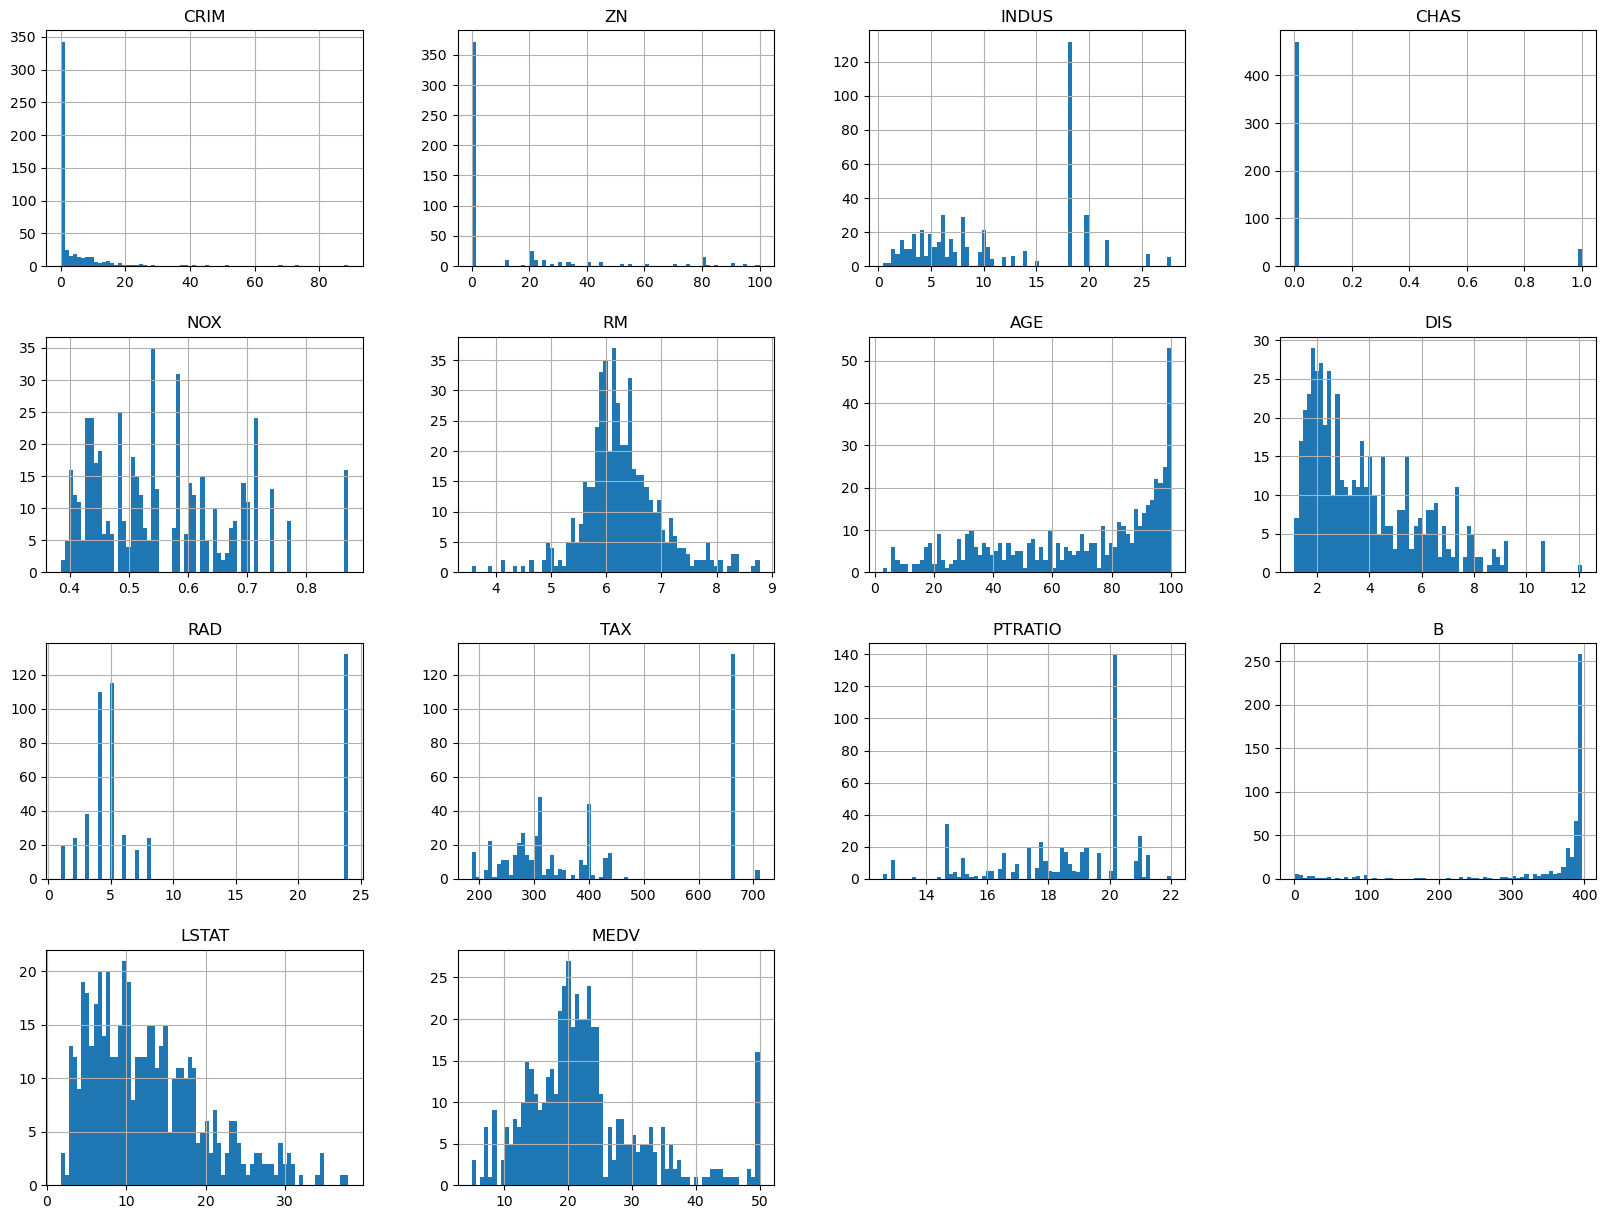

In [6]:
df.hist(bins = 70,figsize = (20,15))
plt.show()

In [7]:
# rougly i could see right skewed data distribution with two features only. i ignored left skewness
df['DIS'] = np.log(df['DIS'])
df['LSTAT'] = np.log(df['LSTAT'])

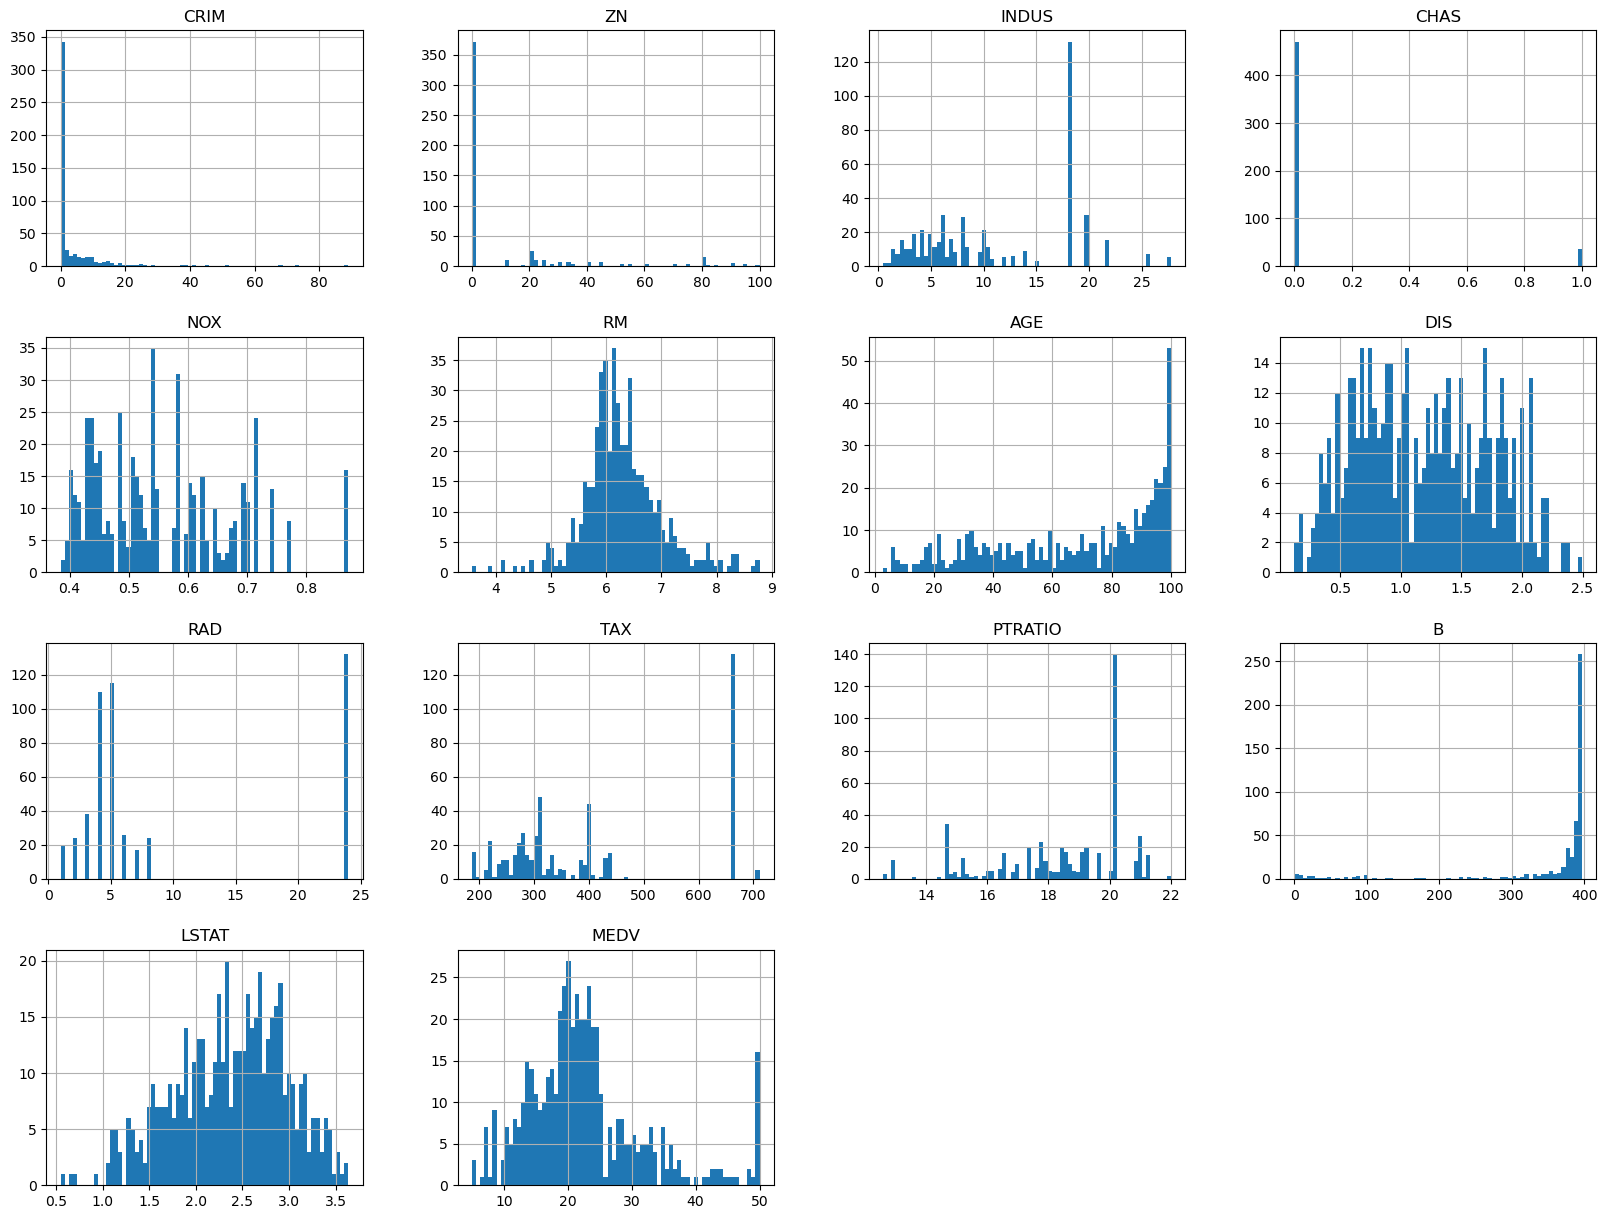

In [8]:
#after performingg data tranformation on skewed data
df.hist(bins = 70,figsize = (20,15))
plt.show()

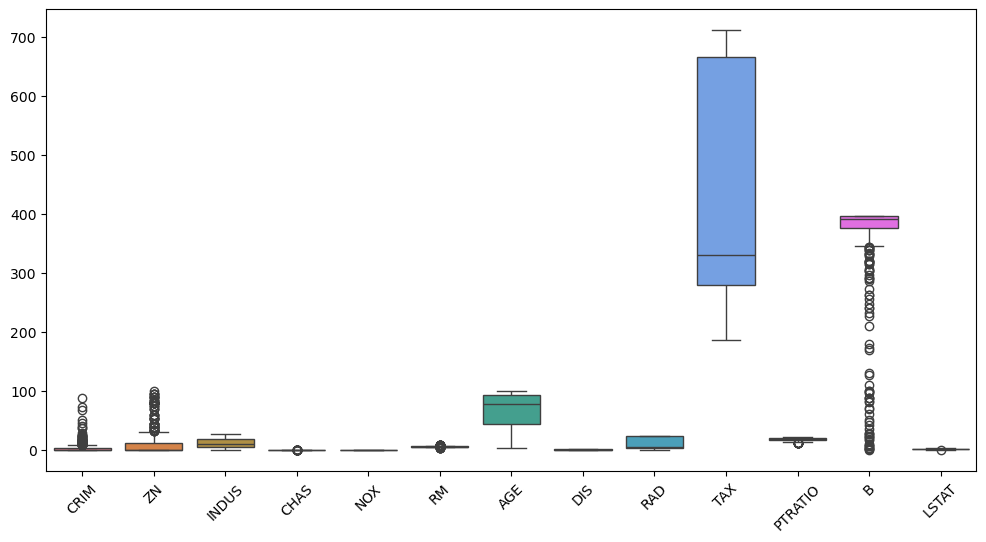

In [10]:
data = df.drop('MEDV',axis=1)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.xticks(rotation=45)
plt.show()

#Ignored outliers for now as I dont have enough knowledge to study,understand their type and remove them.

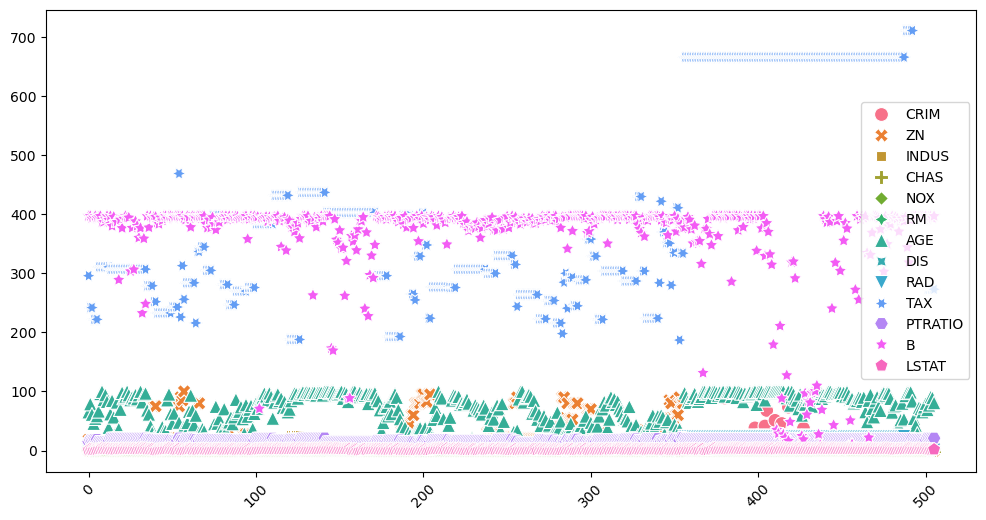

In [11]:
data = df.drop('MEDV',axis=1)
plt.figure(figsize=(12, 6),dpi = 100)
sns.scatterplot(data=data,s = 100)
plt.xticks(rotation=45)
plt.show()

In [12]:
corr_matrix = df.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.292316
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.815442
Name: MEDV, dtype: float64

In [13]:
df = df.drop(['B','CHAS'],axis = 1)

In [14]:
X = df.drop('MEDV',axis = 1)

In [15]:
y = df['MEDV']

In [16]:
#splitting data
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100) # i tried different values in random state, it did not change my error much 

In [22]:
X_train

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
463,5.82115,0.0,18.10,0.7130,6.513,89.9,1.030191,24,666.0,20.2,2.331173
75,0.09512,0.0,12.83,0.4370,6.286,45.0,1.504655,5,398.0,18.7,2.190536
478,10.23300,0.0,18.10,0.6140,6.185,96.7,0.774958,24,666.0,20.2,2.892037
199,0.03150,95.0,1.47,0.4030,6.975,15.3,2.035150,3,402.0,17.0,1.517323
84,0.05059,0.0,4.49,0.4490,6.389,48.0,1.564315,3,247.0,18.5,2.263844
...,...,...,...,...,...,...,...,...,...,...,...
343,0.02543,55.0,3.78,0.4840,6.696,56.4,1.746082,5,370.0,17.6,1.971299
359,4.26131,0.0,18.10,0.7700,6.112,81.3,0.919924,24,666.0,20.2,2.539237
323,0.28392,0.0,7.38,0.4930,5.708,74.3,1.552042,5,287.0,19.6,2.463002
280,0.03578,20.0,3.33,0.4429,7.820,64.5,1.546434,5,216.0,14.9,1.324419


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

In [25]:
scaler.fit(X_train)

StandardScaler()

In [26]:
X_train = scaler.transform(X_train)

In [27]:
X_test = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train,y_train)

LinearRegression()

In [31]:
test_predictions = model.predict(X_test)

In [32]:
test_predictions

array([31.37335972, 35.08083313, 23.30603727, 17.44838308, 19.9873399 ,
       25.41437354, 24.92291994, 22.21504544, 21.86827327, 18.43603602,
       26.45814069, 16.39174095, 19.45899274, 12.1743244 , 40.32889958,
       23.55188882, 29.85789859, 19.33268721, 28.6225175 , 41.39535797,
       32.71878567,  7.71840957, 19.63343331, 17.67776486, 11.26642206,
       14.3759591 , 27.26433322, 18.12570367, 15.99362047, 18.1075483 ,
       14.94474999, 23.62043595, 39.88793071, 25.31773725, 28.34600791,
       34.63462496, 17.3671099 , 14.18294687, 15.82561001, 23.35045584,
       21.11468144, 23.29324171, 15.6972997 , 20.20517576, 33.04401862,
       27.07022493, 16.85883929, 15.6270044 , 14.2078616 , 14.18319644,
       20.5375065 , 19.48725428, 23.61039989, 24.8398057 , 11.66810442,
       13.78984079, 30.04305713, 39.6616598 , 12.55736286, 19.29933679,
       18.8418342 , 19.96487756, 18.37683283, 30.30997213, 21.8107434 ,
       24.13254304, 15.54619156, 30.15568223, 22.3634598 , 20.79

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
mae = mean_absolute_error(y_test,test_predictions)
mse = mean_squared_error(y_test,test_predictions)
rmse = np.sqrt(mse)

In [35]:
mae

3.2945955069794763

In [36]:
mse

23.654471223501286

In [37]:
rmse

np.float64(4.8635862512657555)

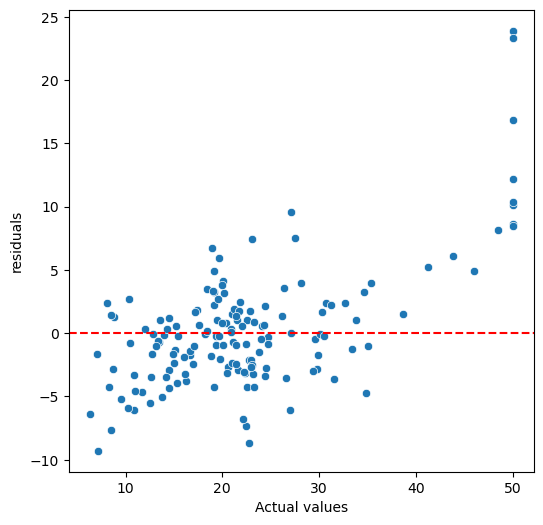

In [38]:
residuals = y_test - test_predictions
plt.figure(figsize=(6, 6))   # resets the figure
sns.scatterplot(x=y_test, y=residuals)
plt.xlabel("Actual values")
plt.ylabel("residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


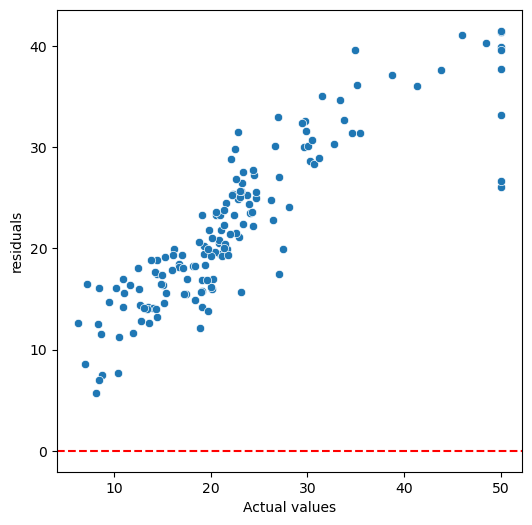

In [41]:
plt.figure(figsize=(6, 6))   # resets the figure
sns.scatterplot(x=y_test, y=test_predictions)
plt.xlabel("Actual values")
plt.ylabel("residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [39]:
df["MEDV"].mean()

np.float64(22.532806324110677)

In [40]:
model.coef_

array([-1.32130968,  0.21998158, -0.12941772, -1.98056191,  1.69130928,
        0.28681075, -3.21730772,  2.82365084, -2.67324247, -1.6832741 ,
       -5.36957024])